# Caso práctico 3 [COLABORATIVO 02]: Solución Agentica NLP

###**Criterio**

**Argumentos**:

<p><b>Transporte</b>: Optimización del Tráfico y la Logística en Tiempo Real
En el transporte, una implementación clave es el análisis de sentimiento y eventos en redes sociales y fuentes de noticias para predecir y gestionar el flujo de tráfico y la logística urbana.</p>


*   **Problema** : Los sistemas de gestión de tráfico tradicionales dependen de sensores fijos (cámaras, bucles inductivos) que no capturan la totalidad de los eventos que afectan la movilidad, como accidentes menores, protestas, eventos deportivos o condiciones peligrosas reportadas por los ciudadanos.
* **Solución con NLP** : Un sistema de NLP puede monitorear en tiempo real plataformas como Twitter, Waze y noticias locales. Es capaz de identificar y clasificar publicaciones que describen incidentes de tráfico, entender su ubicación geográfica (geolocalización) y evaluar su severidad a partir del lenguaje utilizado ("gran accidente", "tráfico detenido", "calle inundada").
* **Impacto** : Permite a las autoridades de tránsito y a las empresas de logística reaccionar de forma proactiva ante disrupciones no detectadas por sensores tradicionales. Esto se traduce en un re-direccionamiento más eficiente de las rutas, una reducción de los congestionamientos, tiempos de entrega más precisos y una mejora en la seguridad vial al alertar a los conductores sobre peligros imprevistos.

<p>A partir de estos argumentos, se requiere que el team se apoye en una red social o la ingenieria de cookies para recomendar al propio usuario o autorizadades plan de acción. El ejercicio NLP busca analizar Cookies u otra contenido social para ofertar al usuario temas de interes. Los temas de interes se pueden enfocar en:</p>

* Deportes/rutinas de ejercicio.
* Peliculas
* Consejos de salud
* Dieta
* Hobie

<p>El cookie o post de red social no posee el todo, por lo cual deben ser combinado con perfiles ampliado de edad y otros datos demograficos de interes.</p>

<p><b>Entregables:</b><p>

* Dataset de perfil y/o Cookies, asi como la fuente de entrenamiento.
* EDA esencial para describir los datos.
* Solucion modular en python (colab, Yupyter, Github, rar/zip).  
* Articulo ciencifico APA con la discusion: intro, marco de referencia, metodo, discusion/result, conclusion [5-10 pags.].
* Video de 3 a 5 minutos con el trabajo colaborativo.

<p><b>Criterio de evaluación:</b><p>
* Dataset y EDA (4 puntos)
* Solucion python (10 puntos)
* Artículo de dibulgación de los hallazgos (6 puntos)


A deep learning approach for detecting traffic accidents from social media data
https://arxiv.org/abs/1801.01528

Traffic accident detection and condition analysis based on social networking data
https://pubmed.ncbi.nlm.nih.gov/33461071/

Traffic-Twitter Transformer: A Nature Language Processing-joined Framework For Network-wide Traffic Forecasting
https://arxiv.org/abs/2206.11078

Enhancing User Recommendations through Context-Driven Natural Language Processing (NLP) and Strategic Feature Selection
https://ijisae.org/index.php/IJISAE/article/view/5436



## **ANALISIS EXPLORATORIO (EDA)**

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("sample_data/health_final_data.csv")

In [3]:
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins',
       'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type', 'sugar_g',
       'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cooking_method',
       'prep_time_min', 'cook_time_min', 'rating', 'Name of Exercise', 'Sets',
       'Reps', 'Benefit', 'Burns Calories (per 30 min)', 'Target Muscle Group',
       'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle',
       'Workout', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg',
       'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn',
       'Burns Calories (per 30 min)_bc', 'Burns_Calories_Bin'],
      dtype='object')

In [4]:
# 1. Descripción general
print("Dimensiones:", df.shape)
print(df.info())
print(df.describe(include='all'))

Dimensiones: (20000, 54)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   Gender                          20000 non-null  object 
 2   Weight (kg)                     20000 non-null  float64
 3   Height (m)                      20000 non-null  float64
 4   Max_BPM                         20000 non-null  float64
 5   Avg_BPM                         20000 non-null  float64
 6   Resting_BPM                     20000 non-null  float64
 7   Session_Duration (hours)        20000 non-null  float64
 8   Calories_Burned                 20000 non-null  float64
 9   Workout_Type                    20000 non-null  object 
 10  Fat_Percentage                  20000 non-null  float64
 11  Water_Intake (liters)           20000 non-null  float64
 12  Workout

In [10]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()

print(f"\nVariables numéricas: {len(num_cols)}")
print(f"Variables categóricas: {len(cat_cols)}")
display(df[num_cols].describe().T)





Variables numéricas: 39
Variables categóricas: 15


,count,mean,std,min,25%,50%,75%,max
Age,20000.0,3.885145e+01,1.211458e+01,1.800000e+01,2.817000e+01,3.986500e+01,4.963000e+01,5.967000e+01
Weight (kg),20000.0,7.389883e+01,2.117301e+01,3.918000e+01,5.816000e+01,7.000000e+01,8.610000e+01,1.307700e+02
Height (m),20000.0,1.723093e+00,1.270328e-01,1.490000e+00,1.620000e+00,1.710000e+00,1.800000e+00,2.010000e+00
Max_BPM,20000.0,1.798897e+02,1.151081e+01,1.593100e+02,1.700575e+02,1.801400e+02,1.894250e+02,1.996400e+02
Avg_BPM,20000.0,1.437043e+02,1.426769e+01,1.190700e+02,1.312200e+02,1.429900e+02,1.560600e+02,1.698400e+02
Resting_BPM,20000.0,6.219581e+01,7.289351e+00,4.949000e+01,5.596000e+01,6.220000e+01,6.809000e+01,7.450000e+01
Session_Duration (hours),20000.0,1.259446e+00,3.413362e-01,4.900000e-01,1.050000e+00,1.270000e+00,1.460000e+00,2.020000e+00
Calories_Burned,20000.0,1.280110e+03,5.022290e+02,3.231100e+02,9.108000e+02,1.231450e+03,1.553112e+03,2.890820e+03
Fat_Percentage,20000.0,2.610131e+01,4.996160e+00,1.133313e+01,2.238781e+01,2.582250e+01,2.967603e+01,3.500000e+01
Water_Intake (liters),20000.0,2.627485e+00,6.047240e-01,1.460000e+00,2.170000e+00,2.610000e+00,3.120000e+00,3.730000e+00


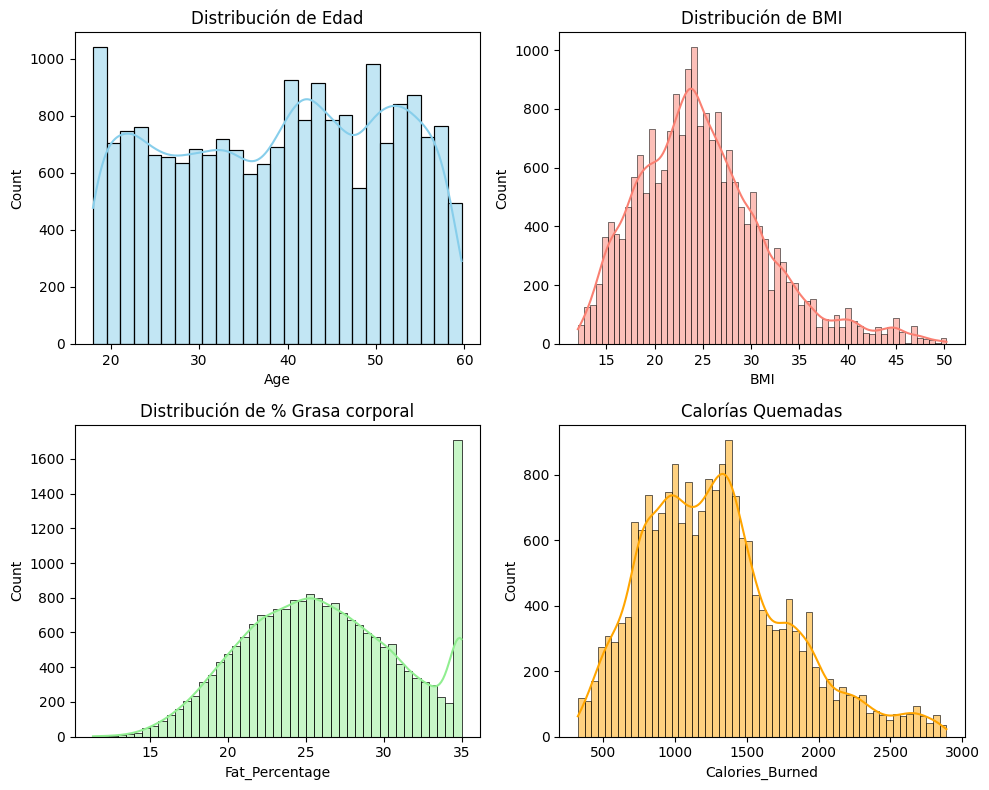

In [14]:
# 3. Distribución de variables categóricas
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
sns.histplot(df['Age'], kde=True, ax=axs[0,0], color='skyblue')
sns.histplot(df['BMI'], kde=True, ax=axs[0,1], color='salmon')
sns.histplot(df['Fat_Percentage'], kde=True, ax=axs[1,0], color='lightgreen')
sns.histplot(df['Calories_Burned'], kde=True, ax=axs[1,1], color='orange')
axs[0,0].set_title("Distribución de Edad")
axs[0,1].set_title("Distribución de BMI")
axs[1,0].set_title("Distribución de % Grasa corporal")
axs[1,1].set_title("Calorías Quemadas")
plt.tight_layout()
plt.show()


/tmp/ipython-input-1396172178.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Workout_Type', order=df['Workout_Type'].value_counts().index, palette="viridis")


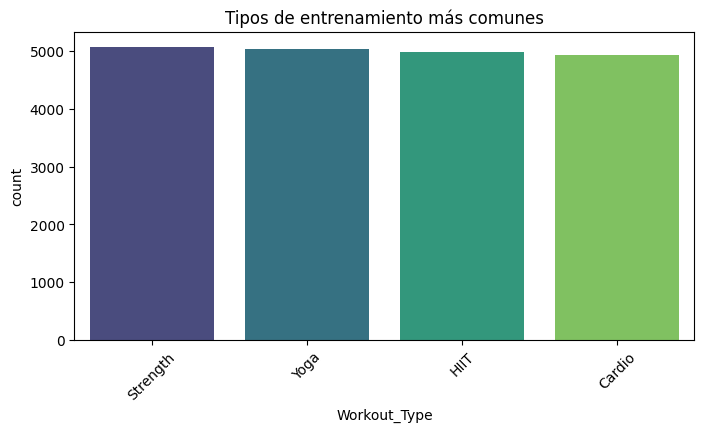

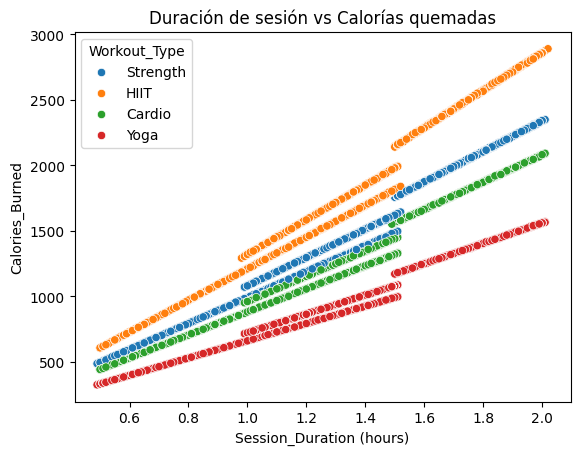

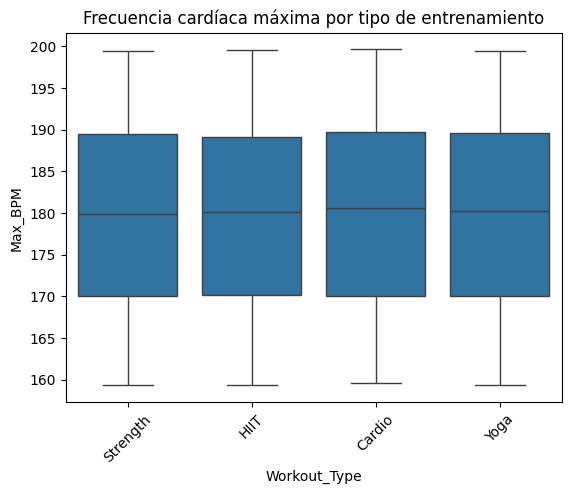

In [18]:
# ==== ANÁLISIS DE ENTRENAMIENTO ====
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Workout_Type', order=df['Workout_Type'].value_counts().index, palette="viridis")
plt.title("Tipos de entrenamiento más comunes")
plt.xticks(rotation=45)
plt.show()

sns.scatterplot(data=df, x='Session_Duration (hours)', y='Calories_Burned', hue='Workout_Type')
plt.title("Duración de sesión vs Calorías quemadas")
plt.show()

sns.boxplot(data=df, x='Workout_Type', y='Max_BPM')
plt.title("Frecuencia cardíaca máxima por tipo de entrenamiento")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-3966048556.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='diet_type', order=df['diet_type'].value_counts().index, palette="mako")


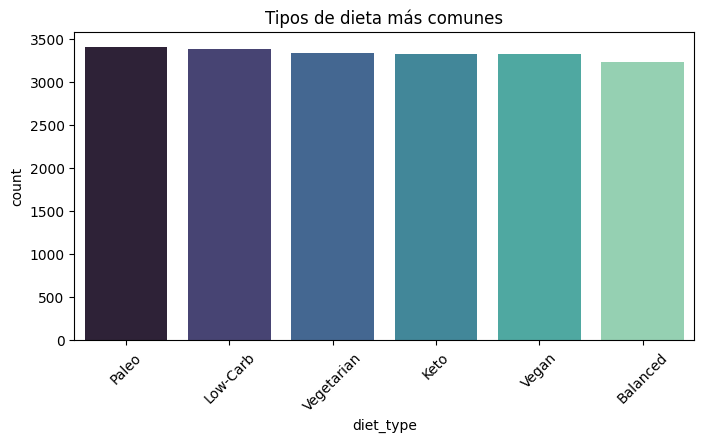

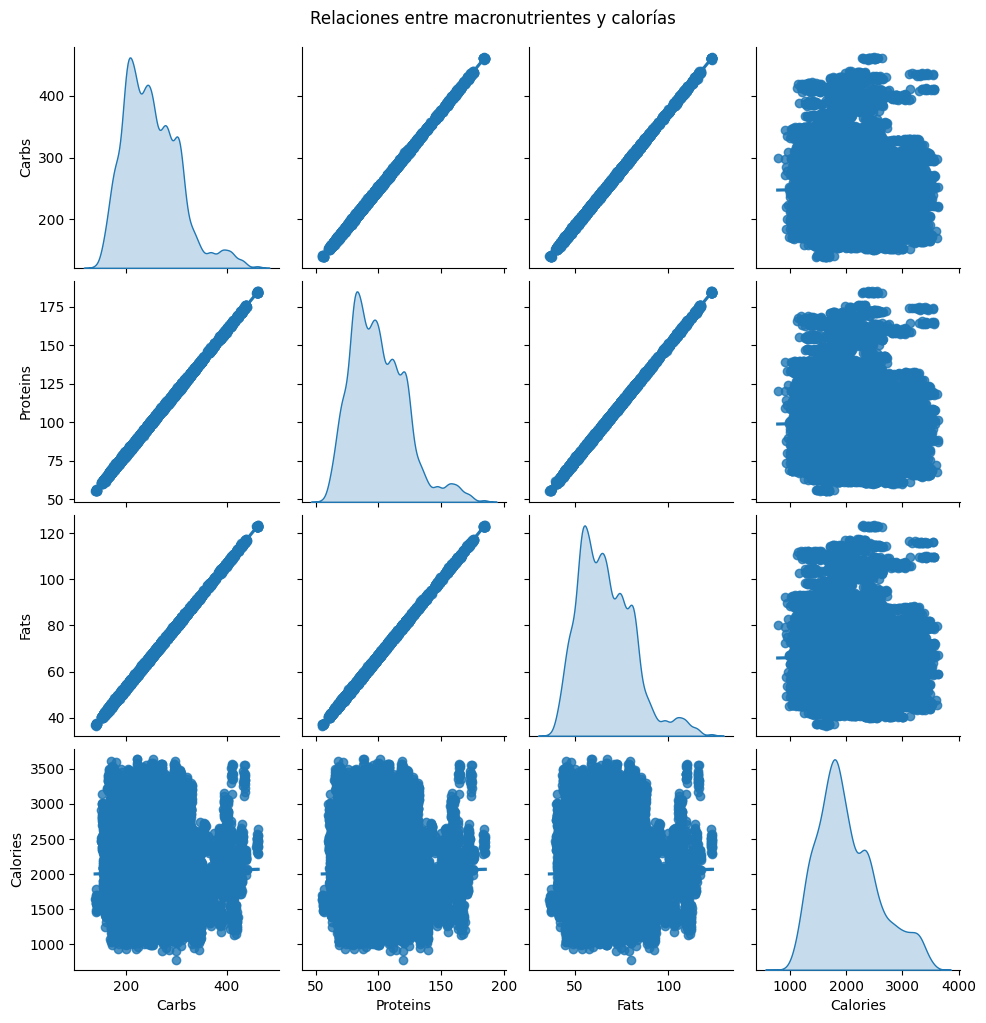

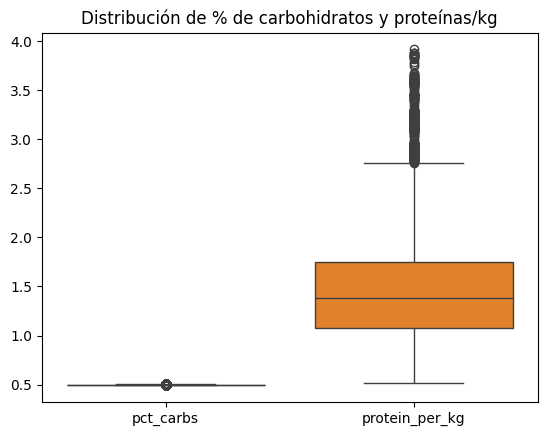

In [19]:
# ==== ANÁLISIS NUTRICIONAL ====
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='diet_type', order=df['diet_type'].value_counts().index, palette="mako")
plt.title("Tipos de dieta más comunes")
plt.xticks(rotation=45)
plt.show()

sns.pairplot(df[['Carbs', 'Proteins', 'Fats', 'Calories']], kind='reg', diag_kind='kde')
plt.suptitle("Relaciones entre macronutrientes y calorías", y=1.02)
plt.show()

sns.boxplot(data=df[['pct_carbs', 'protein_per_kg']])
plt.title("Distribución de % de carbohidratos y proteínas/kg")
plt.show()



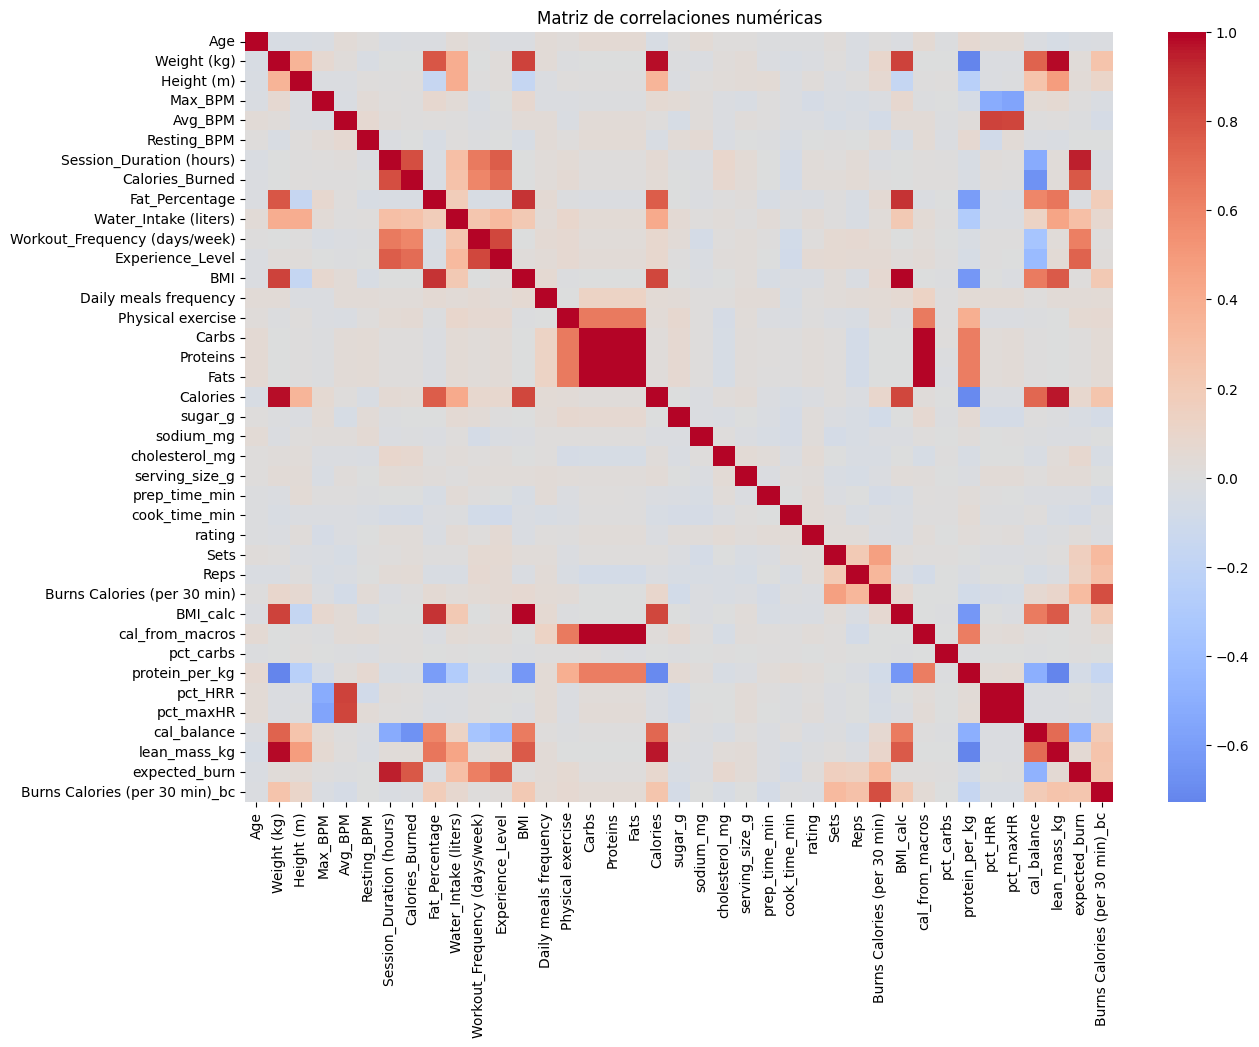


Variables más correlacionadas con 'Calories_Burned':
Calories_Burned                  1.000000
Session_Duration (hours)         0.814368
expected_burn                    0.773932
Experience_Level                 0.697116
Workout_Frequency (days/week)    0.582787
Water_Intake (liters)            0.262731
cholesterol_mg                   0.072296
Physical exercise                0.049113
Calories                         0.047981
Reps                             0.043237
Name: Calories_Burned, dtype: float64


In [20]:
# ==== CORRELACIONES ====
corr = df.corr(numeric_only=True)
plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Matriz de correlaciones numéricas")
plt.show()

target_corr = corr['Calories_Burned'].sort_values(ascending=False)
print("\nVariables más correlacionadas con 'Calories_Burned':")
print(target_corr.head(10))



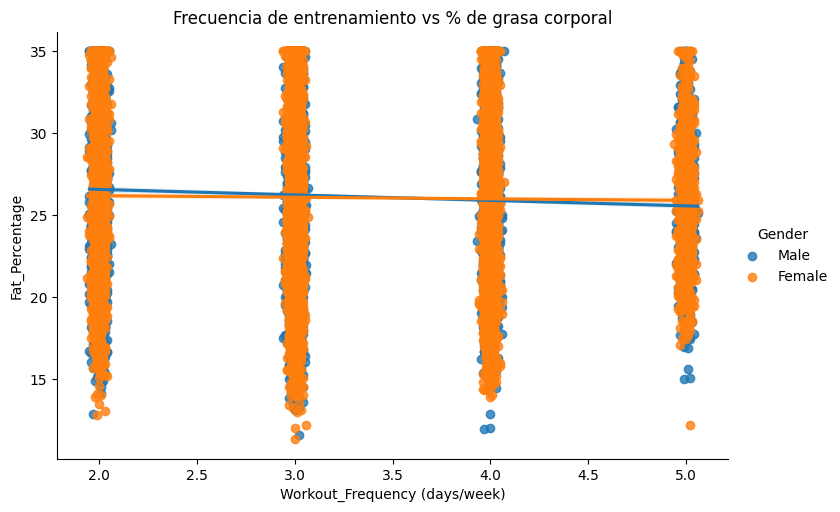

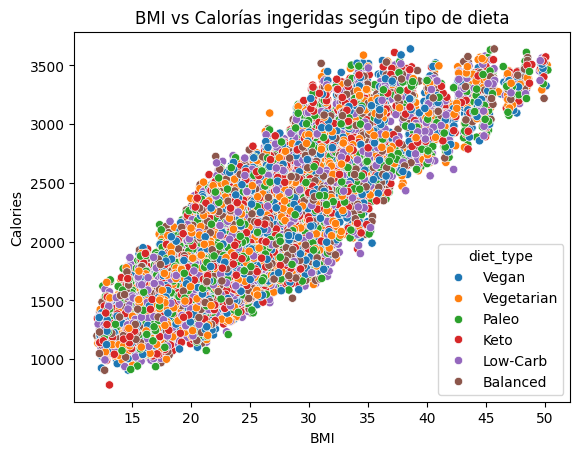

In [22]:
# ==== RELACIONES CLAVE ====
sns.lmplot(data=df, x='Workout_Frequency (days/week)', y='Fat_Percentage', hue='Gender', aspect=1.5)
plt.title("Frecuencia de entrenamiento vs % de grasa corporal")
plt.show()

sns.scatterplot(data=df, x='BMI', y='Calories', hue='diet_type')
plt.title("BMI vs Calorías ingeridas según tipo de dieta")
plt.show()



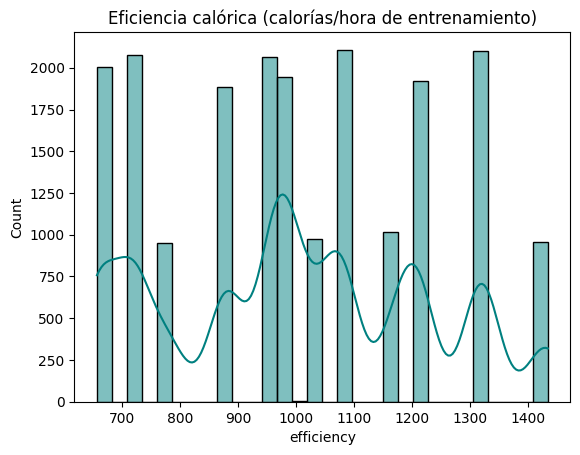

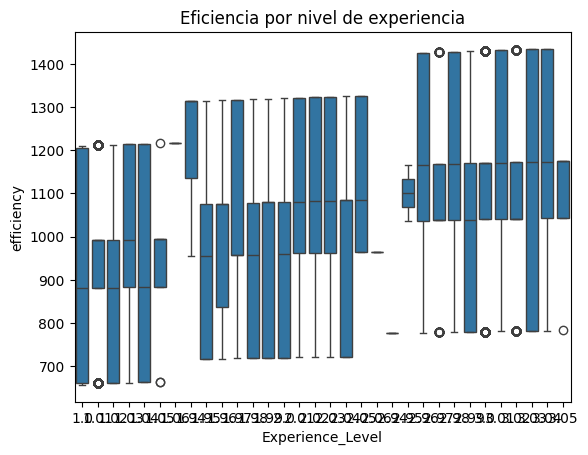

In [23]:

# ==== MÉTRICAS DERIVADAS ====
df['bmi_gap'] = df['BMI_calc'] - df['BMI']
df['efficiency'] = df['Calories_Burned'] / df['Session_Duration (hours)']

sns.histplot(df['efficiency'], bins=30, kde=True, color='teal')
plt.title("Eficiencia calórica (calorías/hora de entrenamiento)")
plt.show()

sns.boxplot(data=df, x='Experience_Level', y='efficiency')
plt.title("Eficiencia por nivel de experiencia")
plt.show()

## **Solucion Modular**

```
fitness_recommender/
│
├── data/
│   └── fitness_dataset.csv
│
├── notebooks/
│   └── 01_EDA.ipynb
│   └── 02_Modelado_Recomendador.ipynb
│
├── src/
│   ├── __init__.py
│   ├── data_loader.py
│   ├── eda_utils.py
│   ├── recommender.py
│   ├── nlp_agent.py
│   └── visualization.py
│
├── app/
│   └── main_app.py
│
├── requirements.txt
└── README.md
```

In [55]:
# src/data_loader.py
import pandas as pd

# def load_data(path: str) -> pd.DataFrame:
def load_data(path):
    df = pd.read_csv(path)
    # df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
    return df

# def preprocess_data(df: pd.DataFrame) -> pd.DataFrame:
def preprocess_data(df):
    # conversión de tipos y derivaciones básicas
    df['bmi_gap'] = df['BMI_calc'] - df['BMI']
    df['efficiency'] = df['Calories_Burned'] / df['Session_Duration (hours)']
    return df

In [46]:
# src/eda_utils.py
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def describe_data(df: pd.DataFrame):
    print("Dimensiones:", df.shape)
    display(df.describe().T)
    display(df.head())

def plot_distributions(df: pd.DataFrame):
    fig, axs = plt.subplots(2, 2, figsize=(10,8))
    sns.histplot(df['BMI'], kde=True, ax=axs[0,0])
    sns.histplot(df['Fat_Percentage'], kde=True, ax=axs[0,1])
    sns.histplot(df['Calories_Burned'], kde=True, ax=axs[1,0])
    sns.histplot(df['efficiency'], kde=True, ax=axs[1,1])
    axs[0,0].set_title('BMI')
    axs[0,1].set_title('% Grasa corporal')
    axs[1,0].set_title('Calorías quemadas')
    axs[1,1].set_title('Eficiencia calórica')
    plt.tight_layout()
    plt.show()

def corr_heatmap(df: pd.DataFrame):
    corr = df.corr(numeric_only=True)
    plt.figure(figsize=(12,8))
    sns.heatmap(corr, cmap='coolwarm')
    plt.title('Matriz de correlaciones')
    plt.show()

In [98]:
# src/recommender.py
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

def get_recommendations(df: pd.DataFrame, user_profile: dict, n=5):
    features = ['Age', 'BMI', 'Fat_Percentage',
                'Workout_Frequency (days/week)', 'Experience_Level']

    scaler = StandardScaler()
    X = scaler.fit_transform(df[features])

    user_df = pd.DataFrame([user_profile])
    user_scaled = scaler.transform(user_df[features])

    sim = cosine_similarity(user_scaled, X)[0]
    df['similarity'] = sim

    top = df.sort_values(by='similarity', ascending=False).head(n)
    return top[['Workout_Type', 'diet_type', 'Calories_Burned', 'similarity']]

In [60]:
# EJEMPLO DE USO
# from src.data_loader import load_data, preprocess_data
# from src.recommender import get_recommendations

# df = preprocess_data(load_data("sample_data/fitness_dataset.csv"))
# df = pd.read_csv("sample_data/fitness_dataset.csv")
# preprocess_data(df)

user_profile = {
    "Age": 28,
    "BMI": 23.5,
    "Fat_Percentage": 18.0,
    "Workout_Frequency (days/week)": 4,
    "Experience_Level": 2
}

recommendations = get_recommendations(df, user_profile)
print(recommendations)

      Workout_Type diet_type  Calories_Burned  similarity
16257       Cardio  Balanced          1256.55    0.993773
8334      Strength      Keto          1266.76    0.978750
19443         Yoga  Low-Carb           727.81    0.972605
7335      Strength  Balanced          1276.52    0.970724
18078         Yoga      Keto           798.53    0.965070


In [63]:
!pip install langchain langchain-experimental langchain-openai openai

In [143]:
# recommender.py
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

class Recommender:
    def __init__(self, model_name="paraphrase-multilingual-MiniLM-L12-v2"):
        self.embed_model = SentenceTransformer(model_name)
        self.item_embeddings = None
        self.df = None

    def fit(self, df, text_column="text"):
        self.df = df
        self.item_embeddings = self.embed_model.encode(df[text_column].tolist(), convert_to_tensor=True)

    def recommend(self, query, top_k=5):
        query_emb = self.embed_model.encode([query], convert_to_tensor=True)
        similarities = cosine_similarity(query_emb, self.item_embeddings)[0]
        indices = np.argsort(similarities)[::-1][:top_k]
        return self.df.iloc[indices]



model_name="paraphrase-multilingual-MiniLM-L12-v2"
embed_model = SentenceTransformer(model_name)
item_embeddings = None

def fit(df, text_column="text"):
    item_embeddings = embed_model.encode(df[text_column].tolist(), convert_to_tensor=True)
    return item_embeddings

def recommend(query, top_k=5):
    query_emb = embed_model.encode([query], convert_to_tensor=True)
    item_embeddings = fit(df, text_column="meal_name")
    similarities = cosine_similarity(query_emb, item_embeddings)[0]
    indices = np.argsort(similarities)[::-1][:top_k]
    return df.iloc[indices]


In [152]:
# src/nlp_agent.py
# from recommender import Recommender

class NLPAagent:
    """Agente estilo 'agentic' que responde preguntas y recomienda ítems"""
    def __init__(self, recommender: Recommender, text_column="meal_name"):
        self.recommender = recommender
        self.text_column = text_column

    def ask(self, consulta, top_k=5, columna_texto='texto_comida'):
        resultados = self.recommend(consulta, top_k=top_k, columna_texto=columna_texto)
        respuesta = f"Según tu consulta '{consulta}', te recomiendo los siguientes items:\n"
        for i, row in enumerate(resultados.itertuples(), 1):
            respuesta += f"{i}. {getattr(row, columna_texto)}\n"
        return respuesta


def ask(user_profile: dict, n=5):
    recommendations = get_recommendations(df, user_profile, n=n)
    response = "Según tu perfil, te recomiendo las siguientes opciones:\n\n"
    for i, row in recommendations.iterrows():
        response += (f"- Ejercicio: {row['Workout_Type']}\n"
                      f"  Dieta: {row['diet_type']}\n"
                      f"  Calorías quemadas aproximadas: {row['Calories_Burned']:.1f}\n"
                      f"  Similitud con tu perfil: {row['similarity']:.2f}\n\n")
    return response

In [ ]:
# src/visualization.py
import seaborn as sns
import matplotlib.pyplot as plt

def plot_efficiency_by_experience(df):
    sns.boxplot(data=df, x='experience_level', y='efficiency')
    plt.title("Eficiencia calórica por nivel de experiencia")
    plt.show()

def plot_diet_vs_calories(df):
    sns.barplot(data=df, x='diet_type', y='calories', errorbar=None)
    plt.xticks(rotation=45)
    plt.title("Promedio de calorías por tipo de dieta")
    plt.show()

In [ ]:
# app/main_app.py
import streamlit as st
from src.data_loader import load_data, preprocess_data
from src.recommender import get_recommendations

st.title("🏋️ Fitness & Nutrition Recommender")

df = preprocess_data(load_data("data/fitness_dataset.csv"))

age = st.slider("Edad", 18, 70, 30)
bmi = st.slider("BMI", 15.0, 35.0, 22.5)
fat = st.slider("% Grasa corporal", 5.0, 40.0, 20.0)
freq = st.slider("Días/semana de entrenamiento", 1, 7, 4)
exp = st.slider("Nivel de experiencia (1-5)", 1, 5, 2)

user_profile = {
    "age": age,
    "bmi": bmi,
    "fat_percentage": fat,
    "workout_frequency_(days/week)": freq,
    "experience_level": exp
}

if st.button("Obtener recomendaciones"):
    recs = get_recommendations(df, user_profile)
    st.dataframe(recs)

In [154]:

# Preguntar algo

# Inicializar y entrenar el recomendador
user_profile = {
    'Age': 30,
    'BMI': 24,
    'Fat_Percentage': 20,
    'Workout_Frequency (days/week)': 3,
    'Experience_Level': 2
}

print(ask(user_profile,n=5))



Según tu perfil, te recomiendo las siguientes opciones:

- Ejercicio: HIIT
  Dieta: Vegetarian
  Calorías quemadas aproximadas: 1780.5
  Similitud con tu perfil: 0.98

- Ejercicio: Strength
  Dieta: Vegan
  Calorías quemadas aproximadas: 1468.8
  Similitud con tu perfil: 0.97

- Ejercicio: Strength
  Dieta: Vegetarian
  Calorías quemadas aproximadas: 1263.6
  Similitud con tu perfil: 0.96

- Ejercicio: Strength
  Dieta: Keto
  Calorías quemadas aproximadas: 1190.0
  Similitud con tu perfil: 0.96

- Ejercicio: Yoga
  Dieta: Paleo
  Calorías quemadas aproximadas: 920.1
  Similitud con tu perfil: 0.96


